In [21]:
import os
import sys
src_dir = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_dir)

from utils import GLOBAL, functions

In [22]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/ArrowheadAnalytics/next-gen-scrapy-2.0/master/pass_and_game_data.csv', index_col=0)

In [24]:
df['season'].unique()

array([2020, 2017, 2018, 2019])

In [25]:
#Change based on year you want to grab. Starts @ 2017 - Present
year = 2020

df_season = df.loc[df['season'] == year]

In [26]:
df_season.head()

,week,name,pass_type,x,y,season,game_id,game_type,gameday,weekday,...,roof,surface,temp,wind,away_coach,home_coach,referee,stadium_id,stadium,defteam
posteam,,,,,,,,,,,,,,,,,,,,,
ARI,10,Kyler Murray,COMPLETE,7.567394,-3.016650,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF
ARI,10,Kyler Murray,COMPLETE,-15.303610,-1.567681,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF
ARI,10,Kyler Murray,COMPLETE,16.040816,3.505631,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF
ARI,10,Kyler Murray,COMPLETE,-2.252197,4.390257,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF
ARI,10,Kyler Murray,COMPLETE,25.880476,6.894967,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF


In [27]:
def plot_passes(player_name, year=year):

  plt.style.use('fivethirtyeight')

  player = df.loc[(df['season'] == year) & (df['name'] == player_name)]

  #grab completions, incompletions, interceptions, and tds separately
  complete = player.loc[player['pass_type'] == 'COMPLETE']
  incomplete = player.loc[player['pass_type'] == 'INCOMPLETE']
  interception = player.loc[player['pass_type'] == 'INTERCEPTION']
  touchdown = player.loc[player['pass_type'] == 'TOUCHDOWN']

  fig, ax = plt.subplots(figsize=(6, 10))

  # scatter plot completions as small green dots with some transparency
  ax.scatter(complete['x'], complete['y'], color='green', alpha=0.6, edgecolors='white')
  # scatter plot incompletions as small red dots with some transparency
  ax.scatter(incomplete['x'], incomplete['y'], color='red', alpha=0.6, edgecolors='white')
  # scatter plot touchdowns as big green dots with less transparency and larger white outline
  ax.scatter(touchdown['x'], touchdown['y'], color='green', alpha=0.8, edgecolors='white', linewidth=2, s=125)
  # scatter plot touchdowns as big red dots with less transparency and larger white outline
  ax.scatter(interception['x'], interception['y'], color='red', alpha=0.8, edgecolors='white', linewidth=2, s=125)


  ax.set_yticks(np.arange(-20, 60, 10));
  ax.set_xticks(np.linspace(-53.3/2, 53.3/2, 4))

  # style the ticks and the visualization border
  ax.tick_params(axis='x', colors="white", grid_alpha=0.4)
  ax.tick_params(axis='y', colors="white", grid_alpha=0.4)
  plt.setp(ax.spines.values(), color='white', alpha=0.2, linewidth=1)

  #line of scrimmage
  ax.hlines(0, -53.3/2, 53.3/2, color='white', linewidth=3, linestyles='dashed', alpha=0.4);

  # set the title of our plot (all caps)
  ax.set_title('\n'+ player_name.upper() + ' pass locations, '.upper() + str(year) + '\n', color='white', alpha=0.6, fontsize=18)

  # set the background color of our plot to a dark blue
  ax.set_facecolor('#233746')
  fig.set_facecolor('#233747')

  # set the legend off to the side
  ax.legend(['Complete Pass', 'Incomplete Pass', 'Touchdown', 'Interception', 'Line of Scrimmage'], 
            ncol=1, loc='upper left', bbox_to_anchor=(1.05, 1), facecolor='#233746', prop={'size': 16})


In [18]:
df_season['name'].unique()

array(['Kyler Murray', 'Matt Ryan', 'Lamar Jackson', 'Josh Allen',
       'Teddy Bridgewater', 'Phillip Walker', 'Nick Foles',
       'Mitchell Trubisky', 'Joe Burrow', 'Brandon Allen', 'Ryan Finley',
       'Baker Mayfield', 'Andy Dalton', 'Dak Prescott', 'Garrett Gilbert',
       'Drew Lock', 'Kendall Hinton', 'Jeff Driskel', 'Matthew Stafford',
       'David Blough', 'Aaron Rodgers', 'Deshaun Watson', 'Philip Rivers',
       'Gardner Minshew', 'Jake Luton', 'Mike Glennon', 'Patrick Mahomes',
       'Chad Henne', 'Derek Carr', 'Justin Herbert', 'Jared Goff',
       'John Wolford', 'Tua Tagovailoa', 'Ryan Fitzpatrick',
       'Kirk Cousins', 'Cam Newton', 'Jarrett Stidham', 'Drew Brees',
       'Taysom Hill', 'Daniel Jones', 'Sam Darnold', 'Joe Flacco',
       'Carson Wentz', 'Jalen Hurts', 'Ben Roethlisberger',
       'Jimmy Garoppolo', 'Nick Mullens', 'Russell Wilson', 'Tom Brady',
       'Ryan Tannehill', 'Dwayne Haskins', 'Alex Smith',
       'Taylor Heinicke', 'Kyle Allen', 'Chri

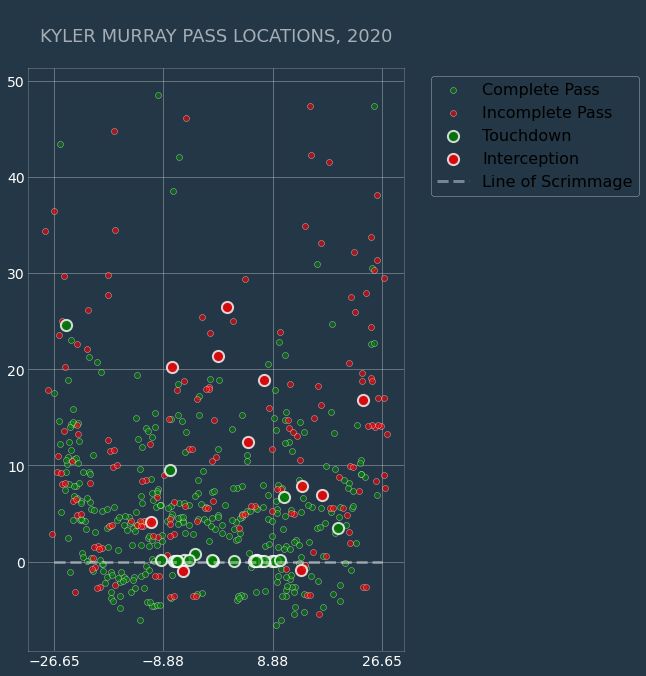

In [29]:
#Choose Player you want to visualize
player = 'Kyler Murray'

plot_passes(player_name=player)